Fazer Imports

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl

Definição de constantes

In [6]:
MAIN_PATH = '/content/drive/MyDrive/'
CLEAN_PATH = MAIN_PATH + 'Data_Football/Liga_Portugal/Clean/'

MAIN_PATH + 'Data_Football/Liga_Portugal/Clean/Liga_Portugal_2022_23_clean.csv'

'/content/drive/MyDrive/Data_Football/Liga_Portugal/Clean/Liga_Portugal_2022_23_clean.csv'

Definições do plot

In [7]:
mtl.rcParams['axes.grid'] = 'True'
mtl.rcParams['axes.spines.top'] = 'False'
mtl.rcParams['axes.spines.right'] = 'False'
mtl.rcParams['xtick.labelsize'] = 20
mtl.rcParams['ytick.labelsize'] = 20


Abrir os dados limpos

In [8]:
df_lp= pd.read_csv(CLEAN_PATH + 'Liga_Portugal_2022_23_clean.csv')
df_lp.head(5)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,0,BENFICA,AROUCA,4,0,H,3,0,H,20,3,6,2,7,6,6,1
1,1,RIOAVE,VIZELA,0,1,A,0,0,D,7,12,0,7,19,16,6,7
2,2,ESTORIL,FAMALICAO,2,0,H,2,0,H,10,15,5,5,13,11,1,2
3,3,PORTO,MARITIMO,5,1,H,3,0,H,22,9,7,3,13,11,4,4
4,4,SANTACLARA,CASAPIA,0,0,D,0,0,D,7,11,3,3,15,12,7,6


Selecionar os jogos para o Sporting

In [10]:
df_sporting = df_lp[(df_lp["HomeTeam"]=="SPLISBON") | (df_lp["AwayTeam"]=="SPLISBON")].copy()
df_sporting.head(5)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
5,5,SPBRAGA,SPLISBON,3,3,D,2,2,D,15,11,7,4,14,17,3,3
11,11,SPLISBON,RIOAVE,3,0,H,1,0,H,20,3,6,1,15,6,7,1
21,21,PORTO,SPLISBON,3,0,H,1,0,H,11,8,5,4,23,11,3,4
29,29,SPLISBON,CHAVES,0,2,A,0,0,D,22,8,10,5,19,16,13,3
37,37,ESTORIL,SPLISBON,0,2,A,0,2,A,5,18,0,4,16,18,2,7


Adicionar colunas de goals e shots ao dataframe do Sporting

In [14]:
df_sporting['goals'] = df_sporting.apply(lambda x : x['FTHG']
  if x['HomeTeam'] == "SPLISBON"
  else x['FTAG'], axis=1)

df_sporting['shots'] = df_sporting.apply(lambda x : x['HS']
  if x['HomeTeam'] == "SPLISBON"
  else x['AS'], axis=1)

df_sporting.head(5)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,goals,shots
5,5,SPBRAGA,SPLISBON,3,3,D,2,2,D,15,11,7,4,14,17,3,3,3,11
11,11,SPLISBON,RIOAVE,3,0,H,1,0,H,20,3,6,1,15,6,7,1,3,20
21,21,PORTO,SPLISBON,3,0,H,1,0,H,11,8,5,4,23,11,3,4,0,8
29,29,SPLISBON,CHAVES,0,2,A,0,0,D,22,8,10,5,19,16,13,3,0,22
37,37,ESTORIL,SPLISBON,0,2,A,0,2,A,5,18,0,4,16,18,2,7,2,18


Plot coluna de golos x shots

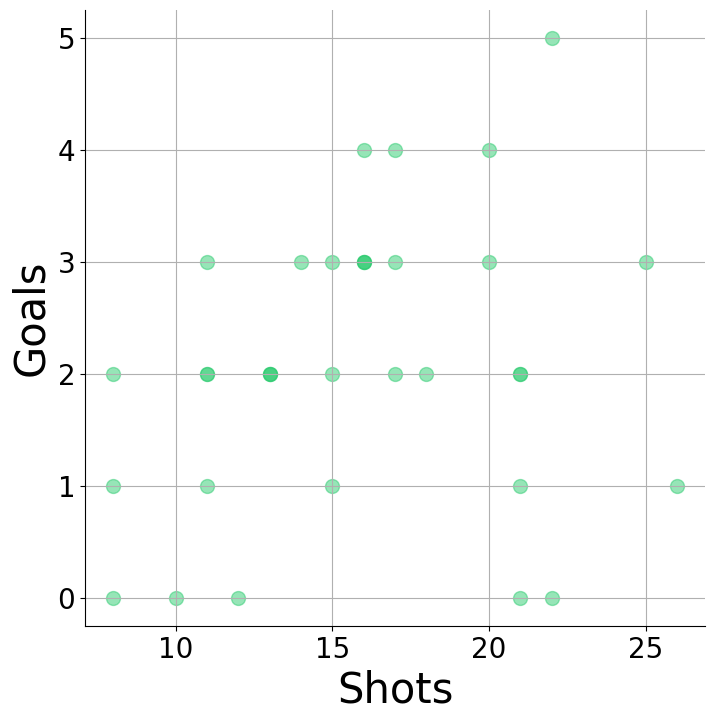

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(df_sporting.shots, df_sporting.goals, s=100, alpha=0.5, c= '#2ECC71' )

ax.set_ylabel('Goals', fontsize=30)
ax.set_xlabel('Shots', fontsize=30)

plt.show()